In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# numpy BUG!!! https://stackoverflow.com/questions/74892927/seaborn-lineplot-typeerror-ufunc-isfinite-not-supported-for-the-input-types
import numpy as np
np.__version__

'1.24.1'

In [5]:
import os
os.getcwd()

'/Users/brian/test'

In [6]:
cluster_scores = pd.read_csv("clusters.graph.sc", sep="\t")
cluster_scores.head()

,cluster_score,description,cluster_file_name
0,-25.5,col_complex4_ensemble_dock_0018_local_refine_0001,c.25.5.pdb
1,-16.5,col_complex4_ensemble_dock_0030_local_refine_0001,c.34.2.pdb
2,-49.5,col_complex4_ensemble_dock_0032_local_refine_0001,c.1.2.pdb
3,-11.0,col_complex4_ensemble_dock_0036_local_refine_0001,c.40.1.pdb
4,-35.5,col_complex4_ensemble_dock_0042_local_refine_0001,c.15.6.pdb


In [7]:
energy_scores = pd.read_csv("scores.graph.sc2", sep="\t")
energy_scores.head()

,total_score,description
0,-246.695,col_complex4_ensemble_dock_0018_local_refine_0001
1,-256.773,col_complex4_ensemble_dock_0030_local_refine_0001
2,-245.511,col_complex4_ensemble_dock_0032_local_refine_0001
3,-209.352,col_complex4_ensemble_dock_0036_local_refine_0001
4,-212.846,col_complex4_ensemble_dock_0042_local_refine_0001


In [8]:
all(energy_scores.description == cluster_scores.description)

True

In [9]:
new_df = pd.concat((energy_scores['total_score'], cluster_scores), axis=1)
new_df = new_df.sort_values(by="cluster_score")
new_df.head()

,total_score,cluster_score,description,cluster_file_name
98,-260.415,-50.0,col_complex4_ensemble_dock_0338_local_refine_0001,c.1.1.pdb
2,-245.511,-49.5,col_complex4_ensemble_dock_0032_local_refine_0001,c.1.2.pdb
81,-221.960,-49.0,col_complex4_ensemble_dock_0293_local_refine_0001,c.2.1.pdb
120,-237.753,-48.5,col_complex4_ensemble_dock_0408_local_refine_0001,c.2.2.pdb
73,-204.584,-48.0,col_complex4_ensemble_dock_0260_local_refine_0001,c.3.1.pdb


In [10]:
# second plot will only be the pdb centroids, i.e. since 51 clusters should have 51 rows
#https://stackoverflow.com/questions/70148181/how-do-i-filter-only-numbers-that-contains-decimal-greater-than-00
new_df_centers = new_df[new_df.cluster_score == np.floor(new_df.cluster_score)]
new_df_centers.shape

(51, 4)

### Vanilla Matplotlib

/var/folders/jy/n2fllj_90y5d4cdv0pl_wtp80000gr/T/ipykernel_59317/1856356733.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(["_".join(i.split('_')[4:7]) for i in new_df.description], rotation=90, ha='right')
/var/folders/jy/n2fllj_90y5d4cdv0pl_wtp80000gr/T/ipykernel_59317/1856356733.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax12.set_xticklabels(new_df.cluster_file_name, rotation=90, ha='right')
/var/folders/jy/n2fllj_90y5d4cdv0pl_wtp80000gr/T/ipykernel_59317/1856356733.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(["_".join(i.split('_')[4:7]) for i in new_df_centers.description], rotation=90, ha='right')
/var/folders/jy/n2fllj_90y5d4cdv0pl_wtp80000gr/T/ipykernel_59317/1856356733.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax22.set_xticklabels(new_df_centers.cluster_file_name, rotation=90, h

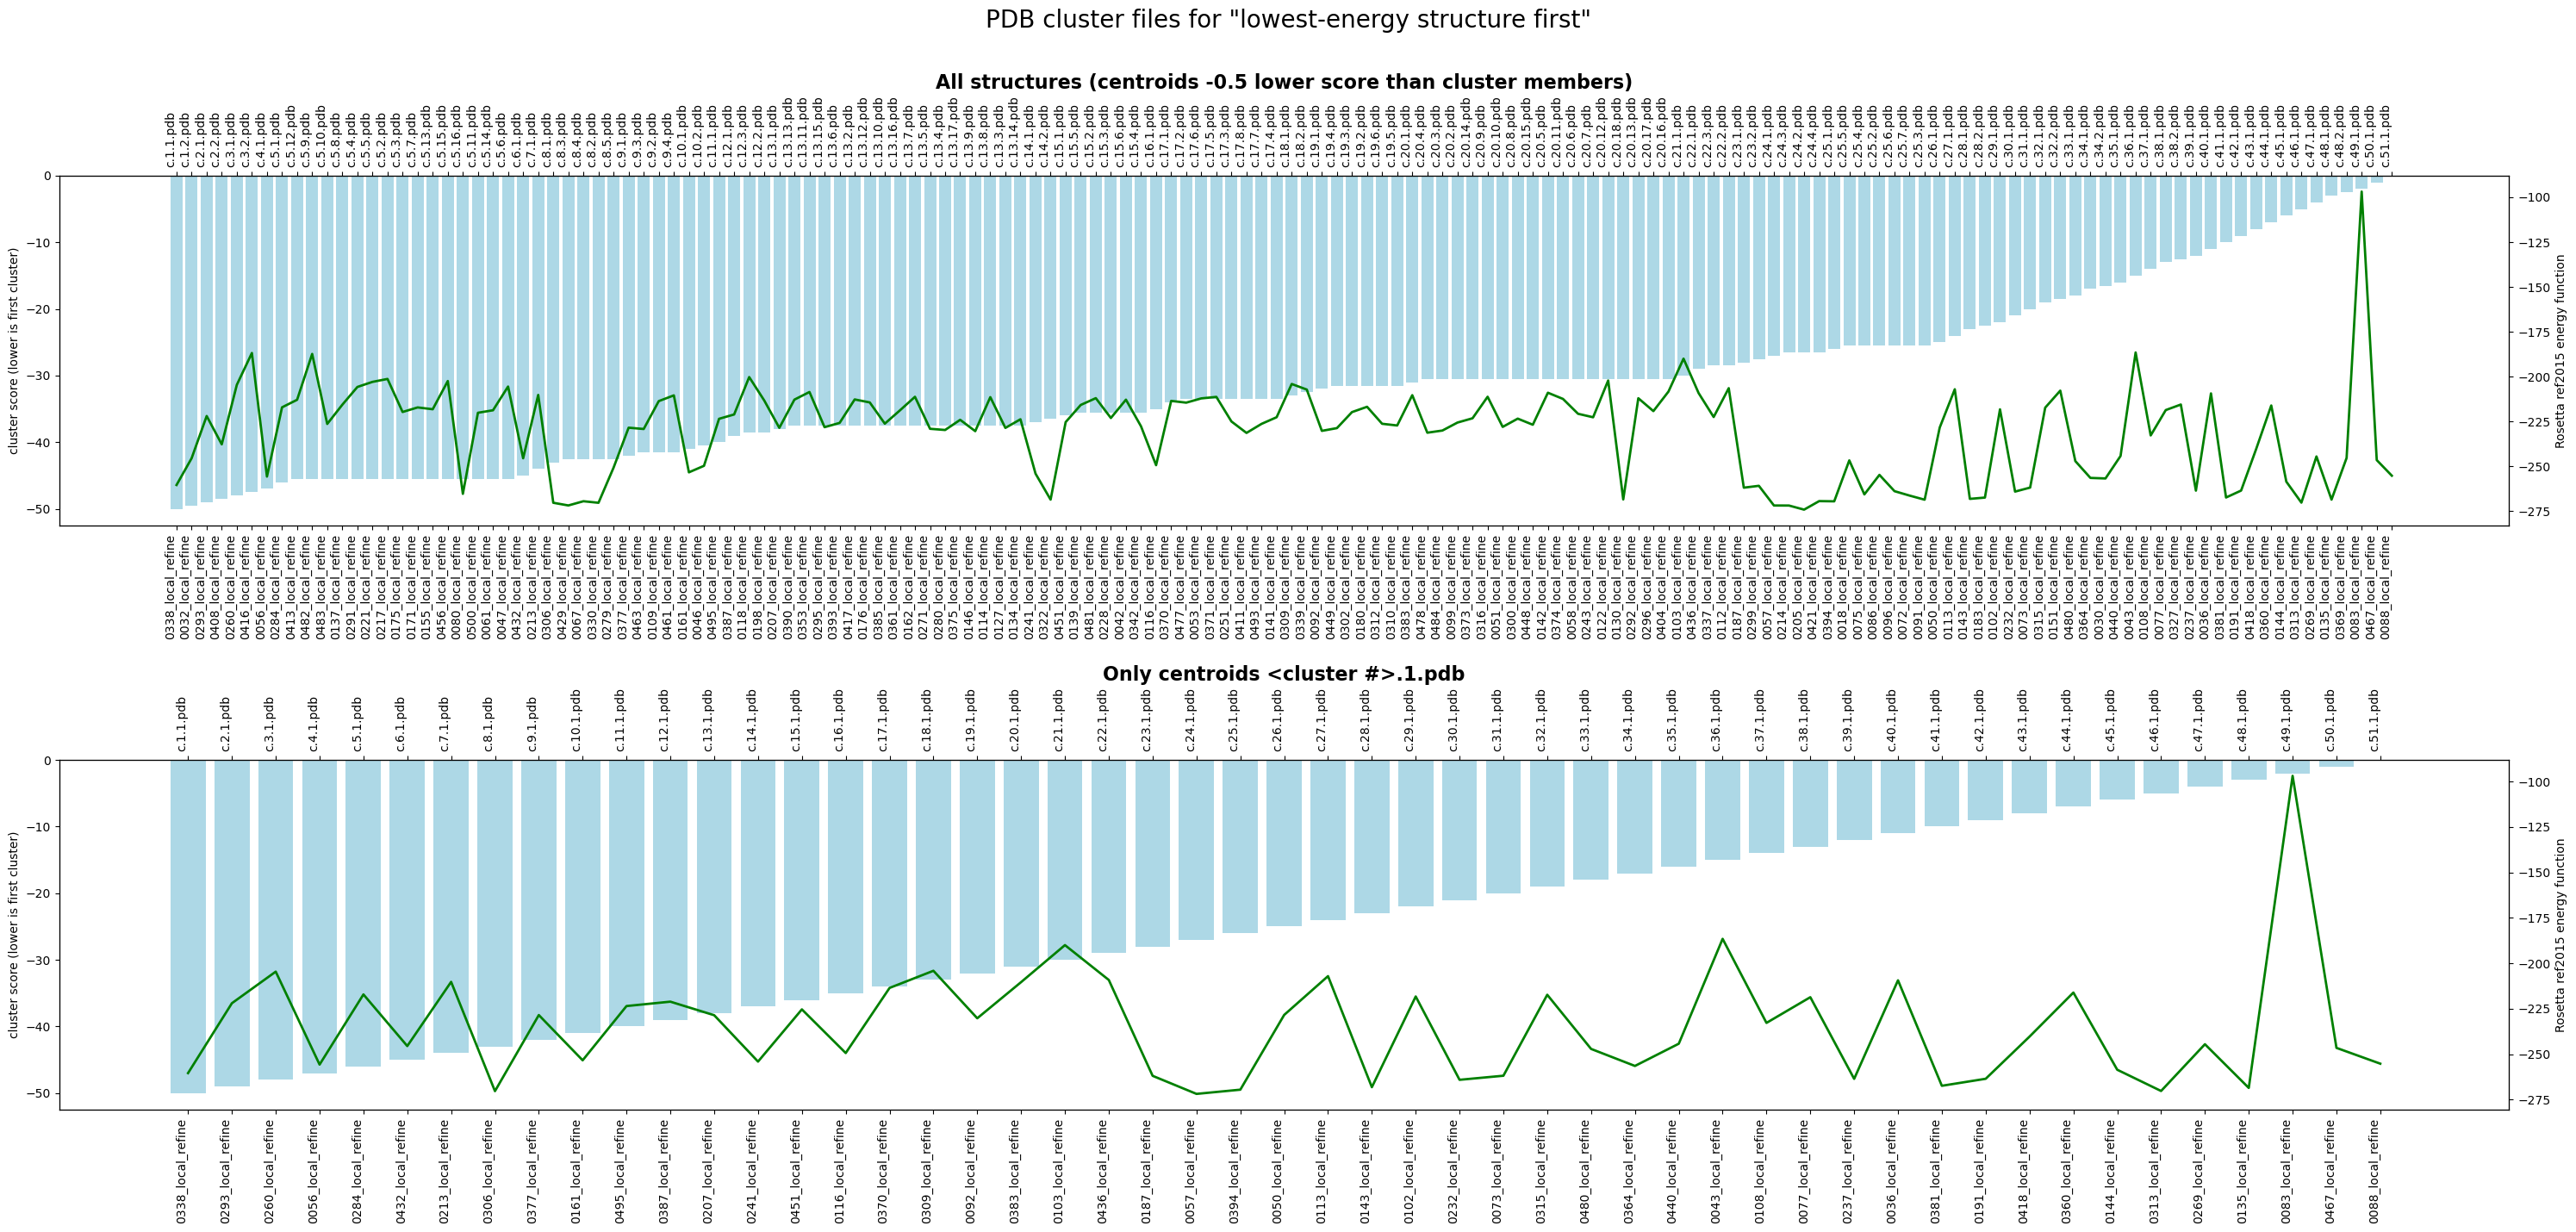

In [16]:
# setup figure, 2 rows of plots x 1 column
fig, ax = plt.subplots(2, 1, figsize=(30, 15))
ax = ax.flatten()

# plot 1
ax[0].bar(new_df.description, new_df.cluster_score, color="lightblue")
ax[0].set_xticklabels(["_".join(i.split('_')[4:7]) for i in new_df.description], rotation=90, ha='right')
ax[0].set_ylabel("cluster score (lower is first cluster)")
ax[0].set_title('All structures (centroids -0.5 lower score than cluster members)', fontsize=16, fontweight="bold")
# second y axis
ax11 = ax[0].twinx()
ax11.plot(new_df.description, new_df.total_score, color="green", linewidth=2)
ax11.set_ylabel("Rosetta ref2015 energy function")

# top x axis, cluster pdb file name
ax12 = ax[0].twiny()
ax12.bar(new_df.description, [0 for i in range(0,len(new_df.description))])
ax12.set_xticklabels(new_df.cluster_file_name, rotation=90, ha='right')


# plot 2
ax[1].bar(new_df_centers.description, new_df_centers.cluster_score, color="lightblue")
ax[1].set_xticklabels(["_".join(i.split('_')[4:7]) for i in new_df_centers.description], rotation=90, ha='right')
ax[1].set_ylabel("cluster score (lower is first cluster)")
ax[1].set_title('Only centroids <cluster #>.1.pdb', fontsize=16, fontweight="bold")
# second y axis
ax21 = ax[1].twinx()
ax21.plot(new_df_centers.description, new_df_centers.total_score, color="green", linewidth=2)
ax21.set_ylabel("Rosetta ref2015 energy function")

# top x axis, cluster pdb file name
ax22 = ax[1].twiny()
ax22.bar(new_df_centers.description, [0 for i in range(0,len(new_df_centers.description))])
ax22.set_xticklabels(new_df_centers.cluster_file_name, rotation=90, ha='right')

# https://stackoverflow.com/questions/8248467/tight-layout-doesnt-take-into-account-figure-suptitle
fig.tight_layout(rect=[0, 0.03, 1, 0.94])
#https://stackoverflow.com/questions/35754511/manipulation-on-vertical-space-in-matplotlib-subplots
fig.subplots_adjust(hspace=0.67)
fig.suptitle('PDB cluster files for "lowest-energy structure first"', fontsize=20)
# plt.show()
plt.savefig("figure.png")

### Seaborn

##### Not much different really.  For basic plotting without a lot of axes stuff seaborn looks nicer which is debatable :)

Example of simple seaborn wrapper...

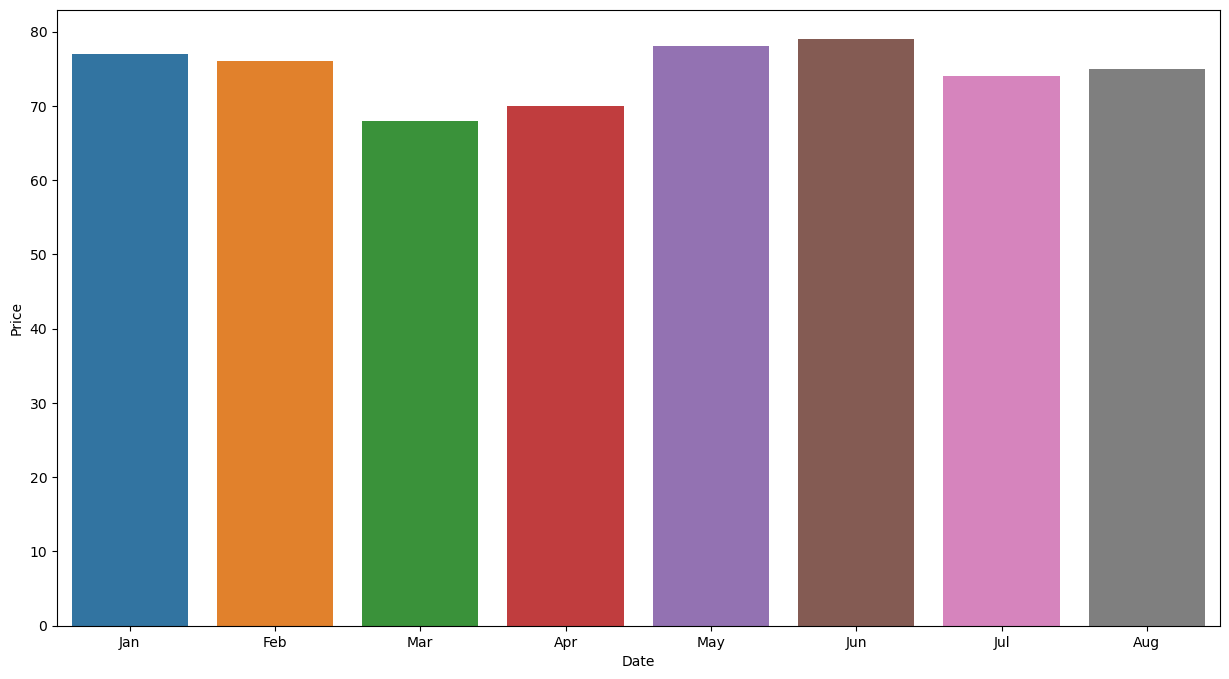

In [4]:
df = pd.DataFrame({"Date": ['01012019','01022019','01032019','01042019',
                             '01052019','01062019','01072019','01082019'],
                   "Price": [77,76,68,70,78,79,74,75]})
df["Date"] = pd.to_datetime(df["Date"], format = "%d%m%Y")

plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Date', y = 'Price',data = df)
blah = ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug"])

#### Replicate Vanilla Matplotlib, isn't much different code wise if you are doing a lot of "decorating" axes anyway.

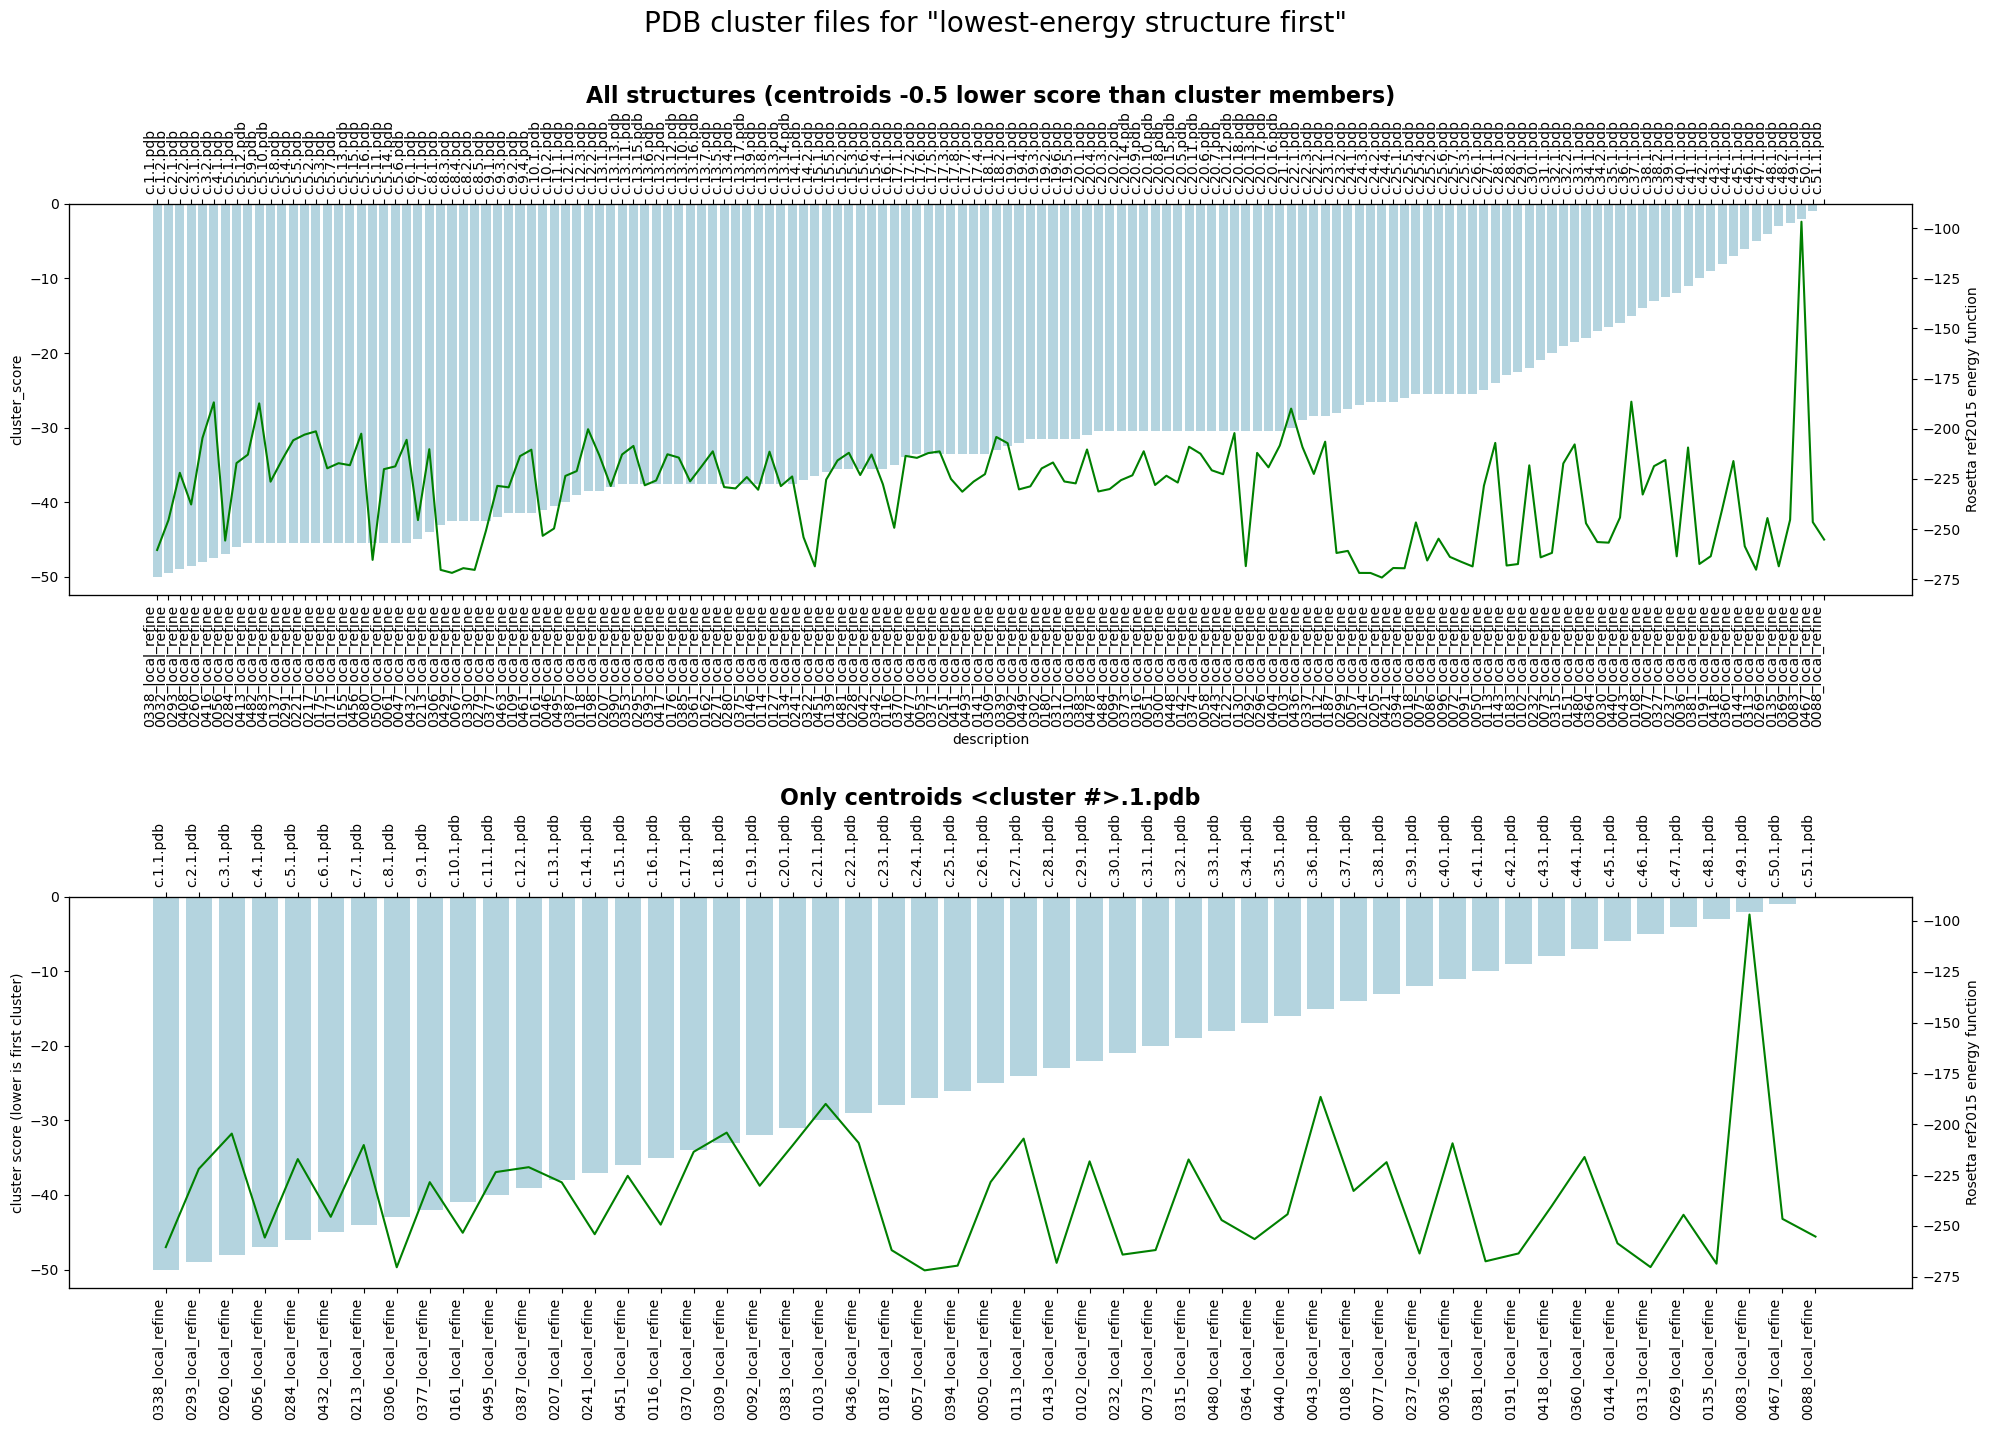

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15))
ax = ax.flatten() # get 2 axis objects

# little different, we assign variable to a `matplotlib.axes._subplots.AxesSubplot` object
# plot 1
ax11 = sns.barplot(ax=ax[0], x=new_df.description, y=new_df.cluster_score, color="lightblue")
ax11.set_xticklabels(["_".join(i.split('_')[4:7]) for i in new_df.description], rotation=90, ha='right')
ax21.set(xlabel=None, ylabel="cluster score (lower is first cluster)")
ax12 = ax11.twinx()
sns.lineplot(data=new_df, x="description" ,y="total_score", color="green", ax=ax12)
ax12.set_ylabel("Rosetta ref2015 energy function")
ax[0].set_title('All structures (centroids -0.5 lower score than cluster members)', fontsize=16, fontweight="bold")

# top x axis, cluster pdb file name
ax12 = ax11.twiny()
#https://stackoverflow.com/questions/50517103/showing-two-data-sets-of-ax2-set-xticklabels-in-a-subplot
ax12.set_xlim(ax11.get_xlim())
ax12.set_xticks(np.arange(len(new_df.description)))
ax12.set_xticklabels(new_df.cluster_file_name, rotation=90, ha='right')


# plot 2 
ax21 = sns.barplot(ax=ax[1], x=new_df_centers.description, y=new_df_centers.cluster_score, color="lightblue")
ax21.set_xticklabels(["_".join(i.split('_')[4:7]) for i in new_df_centers.description], rotation=90, ha='right')
ax21.set(xlabel=None, ylabel="cluster score (lower is first cluster)")
ax22 = ax21.twinx()
sns.lineplot(data=new_df_centers, x="description", y="total_score", color="green", ax=ax22)
ax22.set_ylabel("Rosetta ref2015 energy function")
ax[1].set_title('Only centroids <cluster #>.1.pdb', fontsize=16, fontweight="bold")

# top x axis, cluster pdb file name
ax22 = ax21.twiny()
#https://stackoverflow.com/questions/50517103/showing-two-data-sets-of-ax2-set-xticklabels-in-a-subplot
ax22.set_xlim(ax21.get_xlim())
ax22.set_xticks(np.arange(len(new_df_centers.description)))
ax22.set_xticklabels(new_df_centers.cluster_file_name, rotation=90, ha='right')


fig.tight_layout(rect=[0, 0.03, 1, 0.94])
#https://stackoverflow.com/questions/35754511/manipulation-on-vertical-space-in-matplotlib-subplots
fig.subplots_adjust(hspace=0.77)
fig.suptitle('PDB cluster files for "lowest-energy structure first"', fontsize=20)
plt.show()